In [41]:
class particle(object):  ## We recycle our 1D particle object
    
    def __init__(self, mass=1., x=0., v=0.):
        self.mass = mass
        self.f = 0
        self.x = x
        self.v = v
        
    def move(self, dt):
        # Euler-Cromer
        self.v = self.v + self.f/self.mass*dt
        self.x = self.x + self.v*dt
        
class CoupledSystem(object):

    def __init__(self, N, k, kc, dt): 
        self.N = N
        self.dt = dt
        self.k = k
        self.kc = kc
        self.particles = [particle()]
        for i in range(1,N):
            self.particles.append(particle()) # we create a list of N particles

    def evolve(self):        
        # Compute the interaction forces with the other particles
        for i in range(self.N-1):
            self.particles[i].f = self.kc*(self.particles[i+1].x + self.particles[i-1].x - 2*self.particles[i].x)
        self.particles[0].f = self.kc*(self.particles[1].x - self.particles[0].x) - self.k*self.particles[0].x
        self.particles[N-1].f = self.kc*(self.particles[N-2].x - self.particles[N-1].x) - self.k*self.particles[N-1].x

        for p in self.particles:
            p.move(dt)
            
    def energy(self):
        # Challenge
        return (ke,pe)

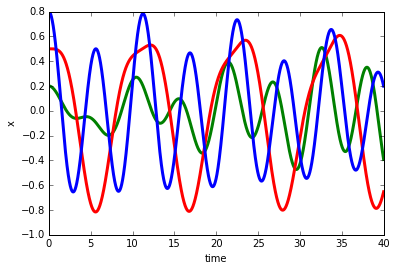

In [42]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.2
S.particles[1].x = 0.5
S.particles[2].x = 0.8

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color = 'blue', ls = '-', lw = 3)

pyplot.xlabel('time')
pyplot.ylabel('x');

This is the positions of the parcticles when $N=3$, $k=1$, $k_{c}=0.2$ with arbitrary and nonzero initial positions. The particles exhibit periodic oscillations over time, and each curves looks like a superposition of two kinds of oscillations.

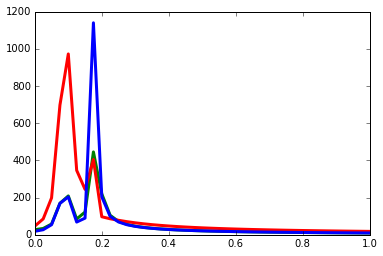

In [43]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,]) 

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)

pyplot.xlim(0,1);

This is the power spectrum for the above conditions.

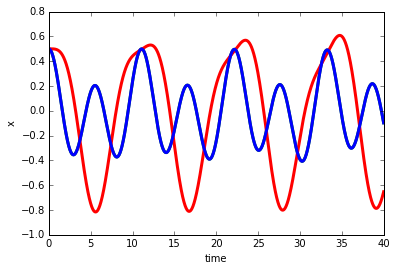

In [44]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.5
S.particles[1].x = 0.5
S.particles[2].x = 0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color = 'blue', ls = '-', lw = 3)

pyplot.xlabel('time')
pyplot.ylabel('x');

This is the positions of the three particles with initial conditions at $0.5$, $0.5$, $0.5$. The green and blue curves are overlapping. 

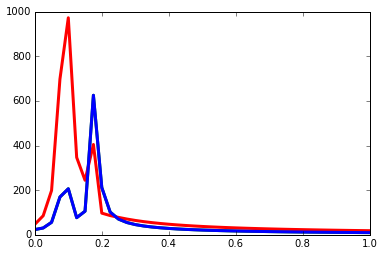

In [45]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,]) 

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)

pyplot.xlim(0,1);

    This is the power spectrum of the three particles with initial conditions at 0.5, 0.5, 0.5. The green and blue curves are overlapping. The first and third particles have natural frequencies at about $0.1$ and $0.18$. The second particle has natural frequencies at about $0.1$ and $0.18$.

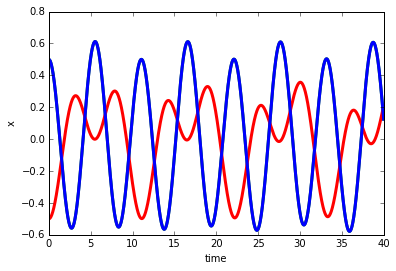

In [46]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.5
S.particles[1].x = -0.5
S.particles[2].x = 0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color = 'blue', ls = '-', lw = 3)

pyplot.xlabel('time')
pyplot.ylabel('x');

This is the positions of the three particles with initial conditions at 0.5, -0.5, 0.5. The green and blue curves are overlapping.

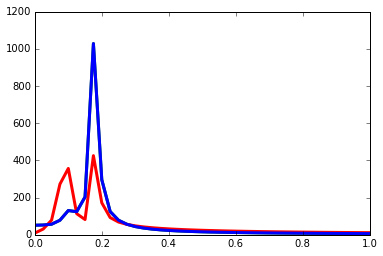

In [47]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,]) 

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)

pyplot.xlim(0,1);

This is the power spectrum of the three particles with initial conditions at 0.5, -0.5, 0.5. The green and blue curves are overlapping. The first and third particles have natural frequencies at about $0.18$. The second particle has natural frequencies at about $0.1$ and $0.18$.

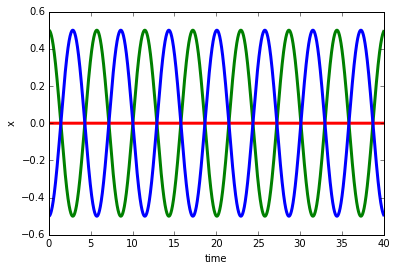

In [48]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.5
S.particles[1].x = 0.
S.particles[2].x = -0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color = 'blue', ls = '-', lw = 3)

pyplot.xlabel('time')
pyplot.ylabel('x');

This is the positions of the three particles with initial conditions at 0.5, 0.5, -0.5. 

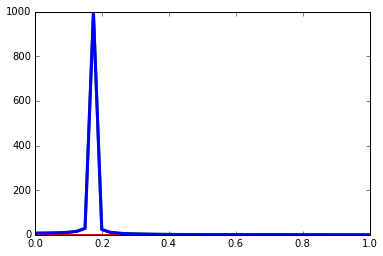

In [49]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,]) 

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)

pyplot.xlim(0,1);

This is the power spectrum of the three particles with initial conditions at 0.5, 0.5, -0.5. The green and blue curves are overlapping. The first and third particles oscillate with frequency about $0.18$. The second particle is fixed at the center of the system.

With driving force on the first particle $F=F_{0}cos(\omega_{0}t)$: 

In [154]:
import math

class particle(object):  ## We recycle our 1D particle object
    
    def __init__(self, mass=1., x=0., v=0., t=0.):
        self.mass = mass
        self.f = 0
        self.x = x
        self.v = v
        self.t = t
        
    def move(self, dt):
        # Euler-Cromer
        self.v = self.v + self.f/self.mass*dt
        self.x = self.x + self.v*dt
        self.t = self.t + dt
        
class CoupledSystem(object):

    def __init__(self, N, k, kc, dt): 
        self.N = N
        self.dt = dt
        self.k = k
        self.kc = kc
        self.particles = [particle()]
        for i in range(1,N):
            self.particles.append(particle()) # we create a list of N particles

    def evolve(self):        
        # Compute the interaction forces with the other particles
        for i in range(self.N-1):
            self.particles[i].f = self.kc*(self.particles[i+1].x + self.particles[i-1].x - 2*self.particles[i].x)
        self.particles[0].f = self.kc*(self.particles[1].x - self.particles[0].x) - self.k*self.particles[0].x + 1.0*math.cos(2.0*self.particles[0].t)
        self.particles[N-1].f = self.kc*(self.particles[N-2].x - self.particles[N-1].x) - self.k*self.particles[N-1].x

        for p in self.particles:
            p.move(dt)
            
    def energy(self):
        # Challenge
        return (ke,pe)

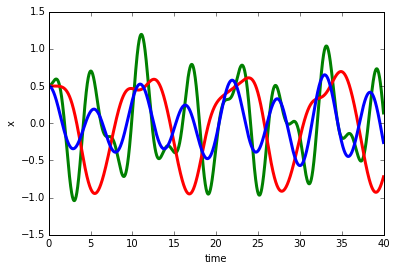

In [161]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)
F0 = 1.0
omega = 0.5

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.5
S.particles[1].x = 0.5
S.particles[2].x = 0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color = 'blue', ls = '-', lw = 3)

pyplot.xlabel('time')
pyplot.ylabel('x');

This is the motions of the three particles with $F_{0}=1.0$, $\omega_{0}=2.0$, and initial positions $0.5$, $0.5$, $0.5$.

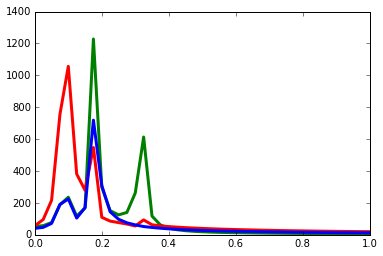

In [156]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,]) 

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)

pyplot.xlim(0,1);

Compared to the power spectrum from part(2), there is an additional frequency of about $0.32$, which is the natural frequency of the driving force.

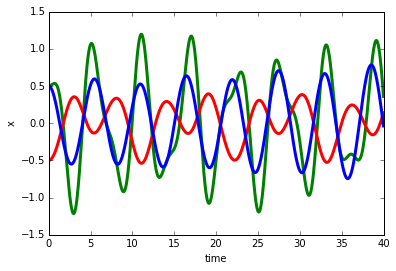

In [157]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)
F0 = 1.0
omega = 0.5

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.5
S.particles[1].x = -0.5
S.particles[2].x = 0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color = 'blue', ls = '-', lw = 3)

pyplot.xlabel('time')
pyplot.ylabel('x');

This is the motions of the three particles with $F_{0}=1.0$, $\omega_{0}=2.0$, and initial positions $0.5$, $-0.5$, $0.5$.

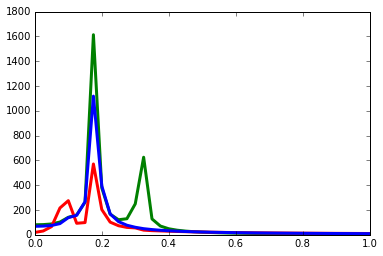

In [158]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,]) 

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)

pyplot.xlim(0,1);

Compared to the power spectrum from part(2), there is an additional frequency of about $0.32$, which is the natural frequency of the driving force.

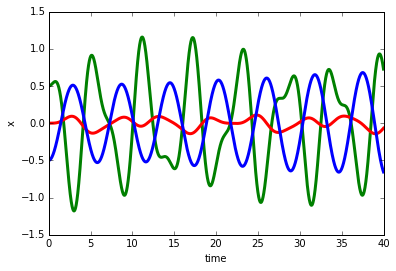

In [159]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)
F0 = 1.0
omega = 0.5

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.5
S.particles[1].x = 0
S.particles[2].x = -0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color = 'blue', ls = '-', lw = 3)

pyplot.xlabel('time')
pyplot.ylabel('x');

This is the motions of the three particles with $F_{0}=1.0$, $\omega_{0}=2.0$, and initial positions $0.5$, $0$, $-0.5$.

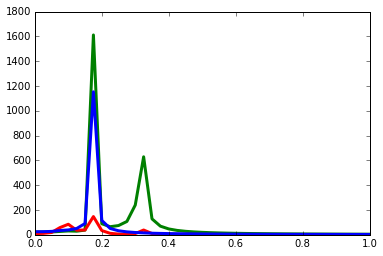

In [160]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,]) 

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)

pyplot.xlim(0,1);

The driving force has added additional vibrational modes to the system: there is a new frequency at $0.32$ which is the natural frequency of the driving force; the first particle has gained an additinal vibrational mode; the second particle is no longer fixed due to assymetry in the first and third particles' motions and has weak vibrations at all three natural frequencies. There are three normal modes of the system. 